In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')
import os
drive_path='/content/drive/Mydrive/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:


# Define the dataset path
base_dir = '/content/drive/MyDrive/dataset'
# Define parameters for image processing
img_height, img_width = 224, 224  # Image size for input
batch_size = 32

# Use ImageDataGenerator to load and augment images
train_datagen = ImageDataGenerator(
    rescale=1.0/255,          # Normalize pixel values to [0, 1]
    rotation_range=30,        # Randomly rotate images
    width_shift_range=0.2,    # Shift images horizontally
    height_shift_range=0.2,   # Shift images vertically
    shear_range=0.2,          # Apply shear transformation
    zoom_range=0.2,           # Apply zoom
    horizontal_flip=True,     # Flip images horizontally
    validation_split=0.2      # Use 20% of the data for validation
)

# Create training and validation generators
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Use training subset
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Use validation subset
)

# Verify class indices
print("Class Indices:", train_generator.class_indices)

Found 1224 images belonging to 6 classes.
Found 306 images belonging to 6 classes.
Class Indices: {'alien_test': 0, 'cloudy': 1, 'foggy': 2, 'rainy': 3, 'shine': 4, 'sunrise': 5}


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from collections import Counter

# Define the dataset path
base_dir = '/content/drive/MyDrive/dataset'

# Define parameters for image processing
img_height, img_width = 224, 224  # Image size for input
batch_size = 32

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,          # Normalize pixel values to [0, 1]
    rotation_range=30,        # Randomly rotate images
    width_shift_range=0.2,    # Shift images horizontally
    height_shift_range=0.2,   # Shift images vertically
    shear_range=0.2,          # Apply shear transformation
    zoom_range=0.2,           # Apply zoom
    horizontal_flip=True,     # Flip images horizontally
    validation_split=0.2      # Use 20% of the data for validation
)

# Training and Validation Generators
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Use training subset
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Use validation subset
)

# Check class indices
print("Class Indices:", train_generator.class_indices)

# Define the CNN Model
model = Sequential([
    Input(shape=(img_height, img_width, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')  # Adjust output layer for the number of classes
])

# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_weather_model.keras', save_best_only=True, monitor='val_loss', mode='min')

# Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size,
    callbacks=[early_stopping, model_checkpoint]
)

# Save the final model
model.save('final_weather_classification_model.keras')

# Evaluate the Model
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Make Predictions
import numpy as np

# Predict on validation set (example)
sample_images, sample_labels = next(val_generator)
predictions = model.predict(sample_images)

# Decode Predictions
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(sample_labels, axis=1)

print(f"Predicted Classes: {predicted_classes}")
print(f"Actual Classes: {actual_classes}")

Found 1224 images belonging to 6 classes.
Found 306 images belonging to 6 classes.
Class Indices: {'alien_test': 0, 'cloudy': 1, 'foggy': 2, 'rainy': 3, 'shine': 4, 'sunrise': 5}
Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 221s 6s/step - accuracy: 0.3913 - loss: 1.6969 - val_accuracy: 0.6076 - val_loss: 1.3149
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.6250 - loss: 1.4739 - val_accuracy: 0.6111 - val_loss: 1.2011
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 216s 5s/step - accuracy: 0.5707 - loss: 1.1263 - val_accuracy: 0.6146 - val_loss: 1.1347
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.5312 - loss: 1.1415 - val_accuracy: 0.5556 - val_loss: 1.0136
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 269s 6s/step - accuracy: 0.6457 - loss: 0.9185 - val_accuracy: 0.6806 - val_loss: 0.8856
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7188 - loss: 0.9111 - val_accuracy: 0.5556 - val_loss: 1.0751
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 241s 5s/step - accura

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from collections import Counter

# Define the dataset path
base_dir = '/content/drive/MyDrive/dataset'

# Define parameters for image processing
img_height, img_width = 224, 224
batch_size = 32

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.5, 1.5],  # Adjust brightness
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Check class distribution and calculate class weights
class_counts = Counter(train_generator.classes)
class_weights = {i: max(class_counts.values()) / count for i, count in class_counts.items()}
print("Class Weights:", class_weights)

# Define an Improved CNN Model
model = Sequential([
    Input(shape=(img_height, img_width, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),  # Normalize activations
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Reduce overfitting
    Dense(len(train_generator.class_indices), activation='softmax')  # Output layer
])

# Compile the Model with Learning Rate Scheduler
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_weather_model_improved.keras', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size,
    class_weight=class_weights,  # Handle imbalanced classes
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

# Save the final model
model.save('final_weather_classification_model_improved.keras')

# Evaluate the Model
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Make Predictions
import numpy as np

# Predict on validation set (example)
sample_images, sample_labels = next(val_generator)
predictions = model.predict(sample_images)

# Decode Predictions
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(sample_labels, axis=1)

print(f"Predicted Classes: {predicted_classes}")
print(f"Actual Classes: {actual_classes}")

Found 1224 images belonging to 6 classes.
Found 306 images belonging to 6 classes.
Class Weights: {0: 11.666666666666666, 1: 1.1666666666666667, 2: 1.1666666666666667, 3: 1.1666666666666667, 4: 1.4, 5: 1.0}
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 616s 14s/step - accuracy: 0.4448 - loss: 24.0305 - val_accuracy: 0.1944 - val_loss: 11.7483 - learning_rate: 0.0010
Epoch 2/50
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3:47 6s/step - accuracy: 0.5625 - loss: 11.8863

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.5625 - loss: 11.8863 - val_accuracy: 0.3333 - val_loss: 8.6557 - learning_rate: 0.0010
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 285s 7s/step - accuracy: 0.4754 - loss: 32.3340 - val_accuracy: 0.2153 - val_loss: 14.3871 - learning_rate: 0.0010
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.3438 - loss: 22.5178 - val_accuracy: 0.3889 - val_loss: 14.5146 - learning_rate: 0.0010
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 270s 7s/step - accuracy: 0.4563 - loss: 37.4952 - val_accuracy: 0.2222 - val_loss: 21.7259 - learning_rate: 0.0010
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 449ms/step - accuracy: 0.3750 - loss: 21.5459 - val_accuracy: 0.1667 - val_loss: 25.3533 - learning_rate: 5.0000e-04
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 307s 7s/step - accuracy: 0.4828 - loss: 29.4962 - val_accuracy: 0.2431 - val_loss: 9.6098 - learning_rate: 5.0000e-04
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.2291 - loss: 10.7783
Validation 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from collections import Counter

# Define the dataset path
base_dir = '/content/drive/MyDrive/dataset'

# Define parameters for image processing
img_height, img_width = 224, 224
batch_size = 32

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.5, 1.5],  # Added brightness adjustment
    horizontal_flip=True,
    validation_split=0.2  # 20% for validation
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Check class distribution and calculate class weights
class_counts = Counter(train_generator.classes)
class_weights = {i: max(class_counts.values()) / count for i, count in class_counts.items()}
print("Class Weights:", class_weights)

# Load the ResNet50 model for transfer learning
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False  # Freeze the base model layers

# Build the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_weather_model_resnet.keras', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size,
    class_weight=class_weights,  # Apply class weights
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

# Save the final model
model.save('final_weather_classification_model_resnet.keras')

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Make Predictions (example on validation data)
import numpy as np

sample_images, sample_labels = next(val_generator)
predictions = model.predict(sample_images)

# Decode Predictions
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(sample_labels, axis=1)

print(f"Predicted Classes: {predicted_classes}")
print(f"Actual Classes: {actual_classes}")

Found 1224 images belonging to 6 classes.
Found 306 images belonging to 6 classes.
Class Weights: {0: 11.666666666666666, 1: 1.1666666666666667, 2: 1.1666666666666667, 3: 1.1666666666666667, 4: 1.4, 5: 1.0}
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 749s 17s/step - accuracy: 0.2053 - loss: 10.0087 - val_accuracy: 0.1910 - val_loss: 1.8533 - learning_rate: 0.0010
Epoch 2/50
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3:37 6s/step - accuracy: 0.3125 - loss: 2.1871

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


38/38 ━━━━━━━━━━━━━━━━━━━━ 24s 484ms/step - accuracy: 0.3125 - loss: 2.1871 - val_accuracy: 0.1667 - val_loss: 1.7921 - learning_rate: 0.0010
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 362s 9s/step - accuracy: 0.2027 - loss: 2.4666 - val_accuracy: 0.0174 - val_loss: 1.7924 - learning_rate: 0.0010
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 166ms/step - accuracy: 0.0000e+00 - loss: 2.1107 - val_accuracy: 0.0556 - val_loss: 1.7919 - learning_rate: 0.0010
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 371s 10s/step - accuracy: 0.0263 - loss: 2.5597 - val_accuracy: 0.0208 - val_loss: 1.7938 - learning_rate: 0.0010
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - accuracy: 0.0312 - loss: 2.6419 - val_accuracy: 0.0000e+00 - val_loss: 1.7941 - learning_rate: 0.0010
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 357s 9s/step - accuracy: 0.0228 - loss: 2.5255 - val_accuracy: 0.0208 - val_loss: 1.7936 - learning_rate: 0.0010
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step - accuracy: 0.0000e+00 - loss: 2.0607 - 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import math
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module="keras.src.trainers.data_adapters.py_dataset_adapter")

# Define the dataset path
base_dir = '/content/drive/MyDrive/dataset'

# Define parameters for image processing
img_height, img_width = 224, 224
batch_size = 8 # Adjust batch size for better handling of smaller datasets

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Calculate steps per epoch
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = val_generator.n // val_generator.batch_size

# Define a CNN Model with Batch Normalization
model = Sequential([
    Input(shape=(img_height, img_width, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the Model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define Callbacks
model_checkpoint = ModelCheckpoint('best_weather_model.keras', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[model_checkpoint, reduce_lr],  # Simplified callback list
    #workers=4,
    #use_multiprocessing=True
)

# Save the Final Model
model.save('final_weather_classification_model.keras')

# Evaluate the Model
loss, accuracy = model.evaluate(val_generator, steps=validation_steps)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Predict on Validation Data
val_predictions = model.predict(val_generator, steps=validation_steps)
y_pred = np.argmax(val_predictions, axis=1)
y_true = val_generator.classes

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=list(train_generator.class_indices.keys())))

# Predict on Sample Batch.
sample_images, sample_labels = next(val_generator)
predictions = model.predict(sample_images)

# Decode Predictions
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(sample_labels, axis=1)

print(f"Predicted Classes: {predicted_classes}")
print(f"Actual Classes: {actual_classes}")

Found 1224 images belonging to 6 classes.
Found 306 images belonging to 6 classes.
Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 523s 3s/step - accuracy: 0.4716 - loss: 3.1611 - val_accuracy: 0.1941 - val_loss: 3.8374 - learning_rate: 1.0000e-04
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 352s 2s/step - accuracy: 0.6020 - loss: 1.7886 - val_accuracy: 0.3947 - val_loss: 2.2021 - learning_rate: 1.0000e-04
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 329s 2s/step - accuracy: 0.6241 - loss: 1.2768 - val_accuracy: 0.5822 - val_loss: 1.4635 - learning_rate: 1.0000e-04
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 301s 2s/step - accuracy: 0.6220 - loss: 1.2368 - val_accuracy: 0.6908 - val_loss: 0.9524 - learning_rate: 1.0000e-04
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.6704 - loss: 1.0595 - val_accuracy: 0.7467 - val_loss: 0.9807 - learning_rate: 1.0000e-04
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 363s 2s/step - accuracy: 0.6787 - loss: 0.9760 - val_accuracy: 0.6250 - val_loss: 1.2779 - l

ValueError: Found input variables with inconsistent numbers of samples: [306, 304]

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import os
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Mount Google Drive if using Colab
from google.colab import drive
drive.mount('/content/drive')

# Define dataset path
base_dir = '/content/drive/MyDrive/dataset'

# Ensure dataset exists
if not os.path.exists(base_dir):
    raise FileNotFoundError(f"❌ Dataset directory '{base_dir}' not found. Check the path!")

# Define parameters
img_height, img_width = 224, 224
batch_size = 16

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Calculate steps per epoch
steps_per_epoch = train_generator.n // batch_size
validation_steps = val_generator.n // batch_size

# Define CNN Model with Batch Normalization
model = Sequential([
    Input(shape=(img_height, img_width, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the Model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define Callbacks
model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/best_weather_model.keras', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[model_checkpoint, reduce_lr],
)

# Save the Final Model
model.save('/content/drive/MyDrive/final_weather_classification_model.keras')

# Ensure the model was saved
if os.path.exists('/content/drive/MyDrive/final_weather_classification_model.keras'):
    print("✅ Model saved successfully!")
else:
    print("❌ Model save failed!")

# Load the Model (Check if the file exists first)
model_path = "/content/drive/MyDrive/final_weather_classification_model.keras"

if os.path.exists(model_path):
    model = tf.keras.models.load_model(model_path, safe_mode=False)
    print("✅ Model loaded successfully!")
else:
    raise FileNotFoundError(f"❌ Model file '{model_path}' not found. Check the path!")

# Evaluate the Model
loss, accuracy = model.evaluate(val_generator, steps=validation_steps)
print(f"✅ Validation Accuracy: {accuracy * 100:.2f}%")

# Predict on Validation Data with Fixed Steps
val_predictions = model.predict(val_generator, steps=validation_steps, verbose=1)

# Convert predictions to class labels
y_pred = np.argmax(val_predictions, axis=1)
y_true = val_generator.classes[:len(y_pred)]  # Trim y_true to match y_pred

# Confusion Matrix and Classification Report
print("\n✅ Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\n✅ Classification Report:")
print(classification_report(y_true, y_pred, target_names=list(train_generator.class_indices.keys())))

# Predict on Sample Batch
sample_images, sample_labels = next(val_generator)
predictions = model.predict(sample_images)

# Decode Predictions
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(sample_labels, axis=1)

print(f"✅ Predicted Classes: {predicted_classes}")
print(f"✅ Actual Classes: {actual_classes}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1224 images belonging to 6 classes.
Found 306 images belonging to 6 classes.
Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 676s 9s/step - accuracy: 0.5018 - loss: 3.0128 - val_accuracy: 0.1941 - val_loss: 3.8718 - learning_rate: 1.0000e-04
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 28s 333ms/step - accuracy: 0.6250 - loss: 2.4307 - val_accuracy: 0.1941 - val_loss: 3.8538 - learning_rate: 1.0000e-04
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 318s 4s/step - accuracy: 0.6490 - loss: 1.3901 - val_accuracy: 0.1974 - val_loss: 10.3012 - learning_rate: 1.0000e-04
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 20s 234ms/step - accuracy: 0.5000 - loss: 1.1283 - val_accuracy: 0.1941 - val_loss: 10.9385 - learning_rate: 1.0000e-04
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 322s 4s/step - accuracy: 0.6513 - loss: 1.2507 - val_accuracy: 0.1941 - val_loss: 9.3360 - learning_rate: 1.0000e-04
Epoch 6

In [ ]:
print("Training Class Labels:", train_generator.class_indices)


Training Class Labels: {'alien_test': 0, 'cloudy': 1, 'foggy': 2, 'rainy': 3, 'shine': 4, 'sunrise': 5}


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import math
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module="keras.src.trainers.data_adapters.py_dataset_adapter")

# Define the dataset path
base_dir = '/content/drive/MyDrive/dataset'

# Define parameters for image processing
img_height, img_width = 224, 224
batch_size = 8 # Adjust batch size for better handling of smaller datasets

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Calculate steps per epoch
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = val_generator.n // val_generator.batch_size

# Define a CNN Model with Batch Normalization
model = Sequential([
    Input(shape=(img_height, img_width, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the Model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define Callbacks
model_checkpoint = ModelCheckpoint('best_weather_model.keras', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[model_checkpoint, reduce_lr],  # Simplified callback list
    #workers=4,
    #use_multiprocessing=True
)

# Save the Final Model
model.save('/content/drive/MyDrive/final_weather_classification_model.keras')

# Evaluate the Model
loss, accuracy = model.evaluate(val_generator, steps=validation_steps)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Predict on Validation Data
val_predictions = model.predict(val_generator, steps=validation_steps)
y_pred = np.argmax(val_predictions, axis=1)
y_true = val_generator.classes

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=list(train_generator.class_indices.keys())))

# Predict on Sample Batch.
sample_images, sample_labels = next(val_generator)
predictions = model.predict(sample_images)

# Decode Predictions
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(sample_labels, axis=1)

print(f"Predicted Classes: {predicted_classes}")
print(f"Actual Classes: {actual_classes}")

Found 1224 images belonging to 6 classes.
Found 306 images belonging to 6 classes.
Epoch 1/25
153/153 ━━━━━━━━━━━━━━━━━━━━ 495s 3s/step - accuracy: 0.4770 - loss: 3.1410 - val_accuracy: 0.1974 - val_loss: 7.2024 - learning_rate: 1.0000e-04
Epoch 2/25
153/153 ━━━━━━━━━━━━━━━━━━━━ 345s 2s/step - accuracy: 0.5850 - loss: 1.5173 - val_accuracy: 0.2401 - val_loss: 5.3409 - learning_rate: 1.0000e-04
Epoch 3/25
153/153 ━━━━━━━━━━━━━━━━━━━━ 344s 2s/step - accuracy: 0.6020 - loss: 1.3911 - val_accuracy: 0.5263 - val_loss: 1.6006 - learning_rate: 1.0000e-04
Epoch 4/25
153/153 ━━━━━━━━━━━━━━━━━━━━ 373s 2s/step - accuracy: 0.6156 - loss: 1.2097 - val_accuracy: 0.6612 - val_loss: 1.1566 - learning_rate: 1.0000e-04
Epoch 5/25
153/153 ━━━━━━━━━━━━━━━━━━━━ 441s 3s/step - accuracy: 0.6885 - loss: 1.0498 - val_accuracy: 0.6678 - val_loss: 1.0218 - learning_rate: 1.0000e-04
Epoch 6/25
153/153 ━━━━━━━━━━━━━━━━━━━━ 444s 3s/step - accuracy: 0.6654 - loss: 1.0594 - val_accuracy: 0.6941 - val_loss: 1.0185 - l

ValueError: Found input variables with inconsistent numbers of samples: [306, 304]

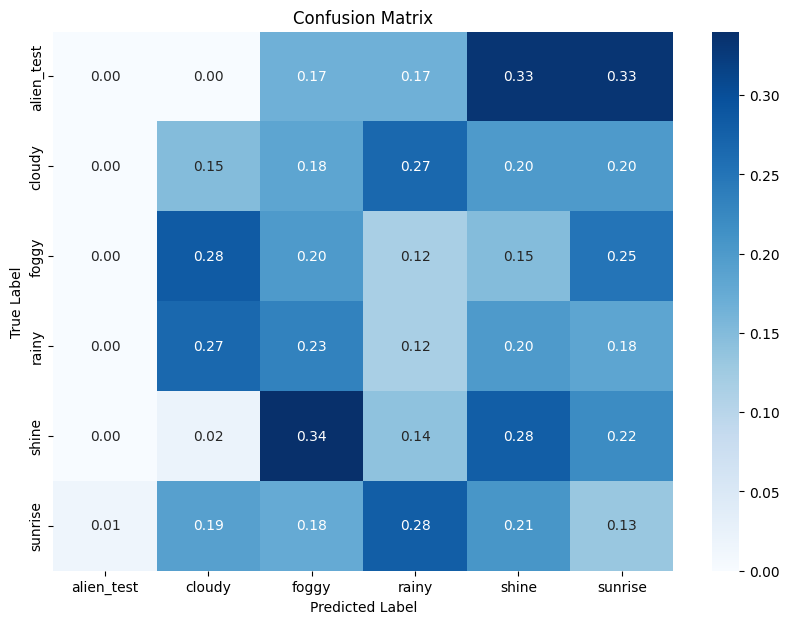


Classification Report:
              precision    recall  f1-score   support

  alien_test       0.00      0.00      0.00         6
      cloudy       0.16      0.15      0.16        60
       foggy       0.18      0.20      0.19        60
       rainy       0.12      0.12      0.12        60
       shine       0.22      0.28      0.25        50
     sunrise       0.15      0.13      0.14        68

    accuracy                           0.17       304
   macro avg       0.14      0.15      0.14       304
weighted avg       0.16      0.17      0.16       304



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Ensure y_true and y_pred have the same length
y_true = y_true[:len(y_pred)]

# Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix (optional)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Extract target names from the train generator
target_names = list(train_generator.class_indices.keys())

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=target_names))

In [ ]:
import tensorflow as tf
import numpy as np
import os
import joblib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Define Dataset Path
base_dir = '/content/drive/MyDrive/dataset'

# Define Parameters
img_height, img_width = 224, 224
batch_size = 8

# Data Augmentation and Preprocessing
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,  # Needed for consistent label mapping
    subset='training'
)

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    subset='validation'
)

# Load Pre-trained CNN (Feature Extractor)
feature_extractor = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
feature_extractor.trainable = False  # Freeze CNN layers

# Function to Extract Features
def extract_features(generator):
    num_samples = generator.n
    features = []
    labels = []

    for i in range(len(generator)):
        images, label_batch = next(generator)
        image_features = feature_extractor.predict(preprocess_input(images))
        image_features = image_features.reshape(image_features.shape[0], -1)  # Flatten
        features.append(image_features)
        labels.append(label_batch)

    features = np.vstack(features)  # Stack all batches
    labels = np.vstack(labels)      # Stack labels
    labels = np.argmax(labels, axis=1)  # Convert one-hot to categorical labels
    return features, labels

# Extract Features for Training and Validation
print("Extracting features for training set...")
X_train, y_train = extract_features(train_generator)

print("Extracting features for validation set...")
X_val, y_val = extract_features(val_generator)

# Encode Labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Train KNN Classifier
k = 5  # Choose k value
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(X_train, y_train_encoded)

# Save KNN Model
joblib.dump(knn, '/content/drive/MyDrive/knn_weather_classifier.pkl')
joblib.dump(label_encoder, '/content/drive/MyDrive/label_encoder.pkl')

# Predict on Validation Set
y_pred = knn.predict(X_val)

# Evaluate Model
accuracy = accuracy_score(y_val_encoded, y_pred)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_val_encoded, y_pred))

print("\nClassification Report:")
print(classification_report(y_val_encoded, y_pred, target_names=train_generator.class_indices.keys()))

Found 1224 images belonging to 6 classes.
Found 306 images belonging to 6 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Extracting features for training set...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━

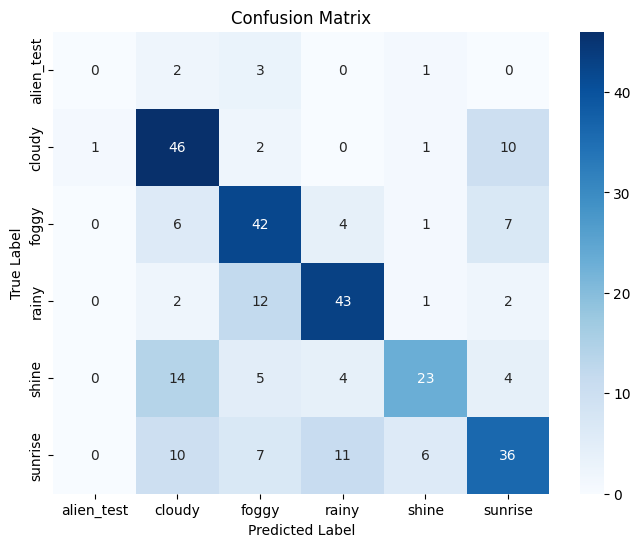

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_val_encoded, y_pred)

# Define class labels (same order as train_generator.class_indices)
class_labels = list(train_generator.class_indices.keys())

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import cv2
import numpy as np
import tensorflow as tf

# Define class labels
class_labels = {
    0: "alien_test",
    1: "cloudy",
    2: "foggy",
    3: "rainy",
    4: "shine",
    5: "sunrise"
}

# Function to classify weather condition
def classify_weather(image, model):
    # Preprocess image
    img_resized = cv2.resize(image, (224, 224))
    img_normalized = img_resized / 255.0  # Normalize pixel values
    img_expanded = np.expand_dims(img_normalized, axis=0)  # Expand dimensions for model input

    # Predict weather condition
    prediction = model.predict(img_expanded)
    predicted_class = np.argmax(prediction)

    return class_labels[predicted_class]

# Function to apply Fourier Transform-based smoothing for rainy images
def apply_fourier_transform(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Fourier Transform (FFT)
    f = np.fft.fft2(gray)
    fshift = np.fft.fftshift(f)

    # Create a mask to remove high-frequency noise (rain streaks)
    rows, cols = gray.shape
    mask = np.zeros((rows, cols), np.uint8)
    center_x, center_y = cols // 2, rows // 2
    mask[center_y - 30:center_y + 30, center_x - 30:center_x + 30] = 1  # Adjust filter size as needed

    # Apply mask and inverse FFT
    fshift_filtered = fshift * mask
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_filtered = np.fft.ifft2(f_ishift)
    img_filtered = np.abs(img_filtered)

    # Normalize image
    img_filtered = cv2.normalize(img_filtered, None, 0, 255, cv2.NORM_MINMAX)
    img_filtered = np.uint8(img_filtered)

    # Convert back to 3-channel image
    enhanced_image = cv2.merge([img_filtered, img_filtered, img_filtered])

    return enhanced_image

# Function to process an image: classify and enhance if needed
def process_image(image_path, model):
    # Read image
    image = cv2.imread(image_path)

    # Classify weather
    weather_condition = classify_weather(image, model)
    print(f"Predicted Weather: {weather_condition}")

    # Apply enhancement if rainy
    if weather_condition == "rainy":
        enhanced_image = apply_fourier_transform(image)
        print("Applied Fourier Transform for rain reduction.")
    else:
        enhanced_image = image
        print("No enhancement applied.")

    # Save and show the enhanced image
    output_path = "enhanced_image.jpg"
    cv2.imwrite(output_path, enhanced_image)
    cv2.imshow("Enhanced Image", enhanced_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    return output_path

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Predicted Weather: rainy
Applied Fourier Transform for rain reduction.


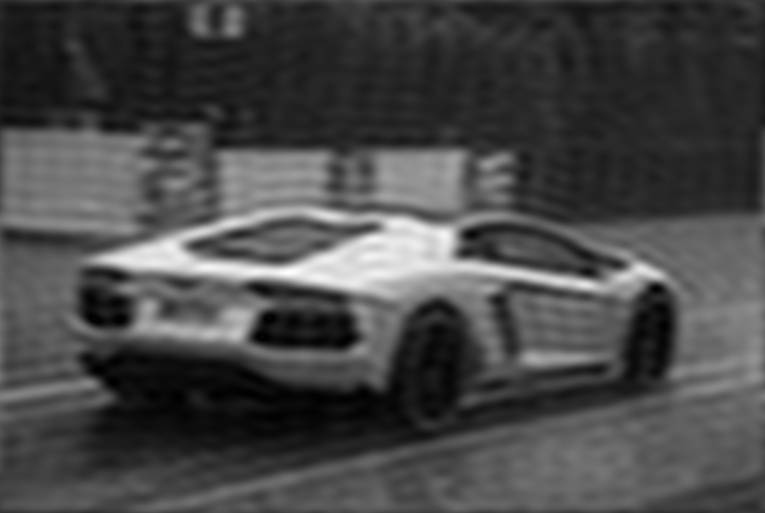

In [ ]:
from google.colab.patches import cv2_imshow

# Function to process an image: classify and enhance if needed
def process_image(image_path, model):
    # Read image
    image = cv2.imread(image_path)

    # Classify weather
    weather_condition = classify_weather(image, model)
    print(f"Predicted Weather: {weather_condition}")

    # Apply enhancement if rainy
    if weather_condition == "rainy":
        enhanced_image = apply_fourier_transform(image)
        print("Applied Fourier Transform for rain reduction.")
    else:
        enhanced_image = image
        print("No enhancement applied.")

    # Save the enhanced image
    output_path = "enhanced_image.jpg"
    cv2.imwrite(output_path, enhanced_image)

    # Display image in Colab (Use cv2_imshow instead of cv2.imshow)
    cv2_imshow(enhanced_image)

    return output_path

# Process an image
processed_image_path = process_image('/content/drive/MyDrive/dataset/rainy/rain1.jpg', model)

In [ ]:
import tensorflow as tf

# Load the original model
model = tf.keras.models.load_model('/content/drive/MyDrive/final_weather_classification_model.h5')

# Create a new model with the same architecture
new_model = tf.keras.models.clone_model(model)

# Ensure all layers and weights are in float32
for layer in new_model.layers:
    layer.set_weights([tf.cast(w, tf.float32) for w in model.get_layer(layer.name).get_weights()])

# Save the new model in float32 format
new_model.save('/content/drive/MyDrive/final_weather_classification_model_float32.h5', include_optimizer=False)

print("✅ Model successfully rebuilt in float32 and saved!")

✅ Model successfully rebuilt in float32 and saved!


In [ ]:
import tensorflow as tf

# Load the original model
model = tf.keras.models.load_model('/content/drive/MyDrive/final_weather_classification_model.h5')

# Convert weights to float32
for layer in model.layers:
    layer.set_weights([tf.cast(w, tf.float32) for w in layer.get_weights()])

# Save the updated model in `.keras` format
model.save('/content/drive/MyDrive/final_weather_classification_model_fixed.keras', save_format='keras')

print("✅ Model successfully converted to float32 and saved as .keras!")

✅ Model successfully converted to float32 and saved as .keras!


In [ ]:
import tensorflow as tf
import numpy as np
import os
import gc
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from sklearn.utils.class_weight import compute_class_weight

# **1️⃣ Clear GPU Memory**
tf.keras.backend.clear_session()
gc.collect()

# **2️⃣ Dataset Paths**
base_dir = "/content/drive/MyDrive/dataset"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# **3️⃣ Data Augmentation**
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=50,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.4,
    zoom_range=0.4,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=8,  # 🔥 Reduced batch size to prevent GPU crash
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=8,  # 🔥 Keep test batch size consistent
    class_mode='categorical',
    shuffle=False
)

# **4️⃣ Compute Class Weights**
from collections import Counter

y_train = train_generator.classes
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)

class_weights = {i: weight for i, weight in enumerate(class_weights)}
print("Updated Class Weights:", class_weights)

# **5️⃣ Load EfficientNetB0**
feature_extractor = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# **6️⃣ Unfreeze More Layers**
for layer in feature_extractor.layers[-80:]:  # 🔥 Unfreeze last 80 layers for better learning
    layer.trainable = True

# **7️⃣ Define Model with More Complexity**
model = Sequential([
    feature_extractor,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),  # 🔥 Increased neurons
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3-class classification (rainy, sunny, cloudy)
])

# **8️⃣ Keep High Learning Rate Longer**
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)  # 🔥 Prevent learning from stopping

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# **9️⃣ Train Model (With Verbose Logging)**
import logging
logging.getLogger("tensorflow").setLevel(logging.INFO)

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20,
    class_weight=class_weights,
    verbose=1  # 🔥 Ensure output is displayed
)

# **🔟 Save Model**
model.save('/content/drive/MyDrive/final_weather_model.keras')

# **🔟 Evaluate**
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Found 1200 images belonging to 3 classes.
Found 541 images belonging to 3 classes.
Updated Class Weights: {0: 1.3333333333333333, 1: 1.3333333333333333, 2: 0.6666666666666666}


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 451s 3s/step - accuracy: 0.6123 - loss: 0.8275 - val_accuracy: 0.3900 - val_loss: 1.0677
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 392s 3s/step - accuracy: 0.8512 - loss: 0.4312 - val_accuracy: 0.4344 - val_loss: 1.0411
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 389s 3s/step - accuracy: 0.8671 - loss: 0.3267 - val_accuracy: 0.6081 - val_loss: 0.8112
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 395s 3s/step - accuracy: 0.8728 - loss: 0.3068 - val_accuracy: 0.5675 - val_loss: 3.0690
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 384s 3s/step - accuracy: 0.8887 - loss: 0.2606 - val_accuracy: 0.4547 - val_loss: 58.0155
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 390s 3s/step - accuracy: 0.9006 - loss: 0.2521 - val_accuracy: 0.4085 - val_loss: 274.2493
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 392s 3s/step - accuracy: 0.9049 - loss: 0.2212 - val_accuracy: 0.4750 - val_loss: 9.0305
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 384s 3s/step - accuracy: 0.9145 - loss: 0.2081 - val_a

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Get true labels and predictions
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate classification report
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Rainy', 'Sunny', 'Cloudy']))

# Display confusion matrix
print("\n🔍 Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

68/68 ━━━━━━━━━━━━━━━━━━━━ 55s 755ms/step

📊 Classification Report:
              precision    recall  f1-score   support

       Rainy       0.20      1.00      0.33       108
       Sunny       0.00      0.00      0.00       212
      Cloudy       0.00      0.00      0.00       221

    accuracy                           0.20       541
   macro avg       0.07      0.33      0.11       541
weighted avg       0.04      0.20      0.07       541


🔍 Confusion Matrix:
[[108   0   0]
 [212   0   0]
 [221   0   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import tensorflow as tf
import numpy as np
import os
import gc
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter

# **1️⃣ Clear GPU Memory**
tf.keras.backend.clear_session()
gc.collect()

# **2️⃣ Dataset Paths**
base_dir = "/content/drive/MyDrive/dataset"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# **3️⃣ Data Augmentation (Ensuring Train & Test Are Processed the Same)**
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=50,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.4,
    zoom_range=0.4,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Ensure test preprocessing matches train

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=8,  # Reduced batch size to avoid memory issues
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    shuffle=False
)

# **4️⃣ Compute Class Weights to Fix Imbalance**
y_train = train_generator.classes
counter = Counter(y_train)
print("Class Distribution:", counter)  # Print dataset class balance

class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)

class_weights = {i: weight for i, weight in enumerate(class_weights)}
print("Computed Class Weights:", class_weights)

# **5️⃣ Load EfficientNetB0**
feature_extractor = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# **6️⃣ Unfreeze More Layers for Fine-Tuning**
for layer in feature_extractor.layers[-80:]:  # Unfreeze last 80 layers
    layer.trainable = True

# **7️⃣ Define Model with Stronger Regularization**
model = Sequential([
    feature_extractor,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.6),  # Increased dropout to prevent overfitting
    Dense(3, activation='softmax')  # 3-class classification
])

# **8️⃣ Keep Higher Learning Rate Longer**
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)  # Prevent learning stalls

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# **9️⃣ Implement Learning Rate Adjustment & Early Stopping**
callbacks = [
    ModelCheckpoint('/content/drive/MyDrive/best_weather_model.keras', save_best_only=True, monitor='val_loss', mode='min'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-7),
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
]

# **🔟 Train Model Using Class Weights**
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20,
    class_weight=class_weights,  # Apply class weights to fix imbalance
    callbacks=callbacks
)

# **🔟 Save Final Model**
model.save('/content/drive/MyDrive/final_weather_model.keras')

# **🔟 Re-Evaluate Model on Test Data**
test_steps = np.ceil(test_generator.n / test_generator.batch_size)  # Ensure all test images are covered

test_steps = int(np.ceil(test_generator.n / test_generator.batch_size))  # Convert to integer
print(f"✅ Test Accuracy (Re-evaluated): {test_accuracy * 100:.2f}%")

# **📊 Generate Classification Report & Confusion Matrix**
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator, steps=test_steps)
y_pred = np.argmax(y_pred_prob, axis=1)

print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Rainy', 'Sunny', 'Cloudy']))

print("\n🔍 Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

Found 1200 images belonging to 3 classes.
Found 541 images belonging to 3 classes.
Class Distribution: Counter({2: 600, 0: 300, 1: 300})
Computed Class Weights: {0: 1.3333333333333333, 1: 1.3333333333333333, 2: 0.6666666666666666}


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 460s 3s/step - accuracy: 0.5725 - loss: 0.8858 - val_accuracy: 0.3919 - val_loss: 1.1401 - learning_rate: 1.0000e-04
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 438s 3s/step - accuracy: 0.8181 - loss: 0.4288 - val_accuracy: 0.4492 - val_loss: 1.0975 - learning_rate: 1.0000e-04
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 399s 3s/step - accuracy: 0.8637 - loss: 0.3368 - val_accuracy: 0.5009 - val_loss: 1.1561 - learning_rate: 1.0000e-04
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 400s 3s/step - accuracy: 0.8484 - loss: 0.3527 - val_accuracy: 0.3974 - val_loss: 1.4831 - learning_rate: 1.0000e-04
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 399s 3s/step - accuracy: 0.8622 - loss: 0.3347 - val_accuracy: 0.6211 - val_loss: 0.9186 - learning_rate: 5.0000e-05
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 402s 3s/step - accuracy: 0.8683 - loss: 0.2971 - val_accuracy: 0.5139 - val_loss: 10.8112 - learning_rate: 5.0000e-05
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 405s 3s/step - ac

In [ ]:
import tensorflow as tf
import numpy as np
import os
import gc
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter

# **1️⃣ Clear GPU Memory**
tf.keras.backend.clear_session()
gc.collect()

# **2️⃣ Dataset Paths**
base_dir = "/content/drive/MyDrive/dataset"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# **3️⃣ Enhanced Data Augmentation**
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=60,
    width_shift_range=0.5,
    height_shift_range=0.5,
    shear_range=0.5,
    zoom_range=0.5,
    brightness_range=[0.3, 1.7],
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    shuffle=False
)

# **4️⃣ Compute Class Weights to Fix Imbalance**
y_train = train_generator.classes
counter = Counter(y_train)
print("Class Distribution:", counter)

class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)

class_weights = {i: weight for i, weight in enumerate(class_weights)}
print("Computed Class Weights:", class_weights)

# **5️⃣ Load EfficientNetB0 & Unfreeze More Layers**
feature_extractor = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in feature_extractor.layers[-100:]:  # 🔥 Unfreeze last 100 layers
    layer.trainable = True

# **6️⃣ Define Model with Stronger Regularization**
model = Sequential([
    feature_extractor,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.6),
    Dense(3, activation='softmax')
])

# **7️⃣ Cosine Decay Learning Rate**
lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-4,
    decay_steps=1000,
    alpha=0.01
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# **8️⃣ Implement Learning Rate Adjustment & Early Stopping**
callbacks = [
    ModelCheckpoint('/content/drive/MyDrive/best_weather_model.keras', save_best_only=True, monitor='val_loss', mode='min'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-7),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)  # 🔥 Increased patience
]

# **9️⃣ Train Model Using Class Weights**
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20,
    class_weight=class_weights,
    callbacks=callbacks
)

# **🔟 Save Final Model**
model.save('/content/drive/MyDrive/final_weather_model.keras')

# **🔟 Re-Evaluate Model on Test Data**
test_steps = int(np.ceil(test_generator.n / test_generator.batch_size))

test_loss, test_accuracy = model.evaluate(test_generator, steps=test_steps)
print(f"✅ Test Accuracy (Re-evaluated): {test_accuracy * 100:.2f}%")

# **📊 Generate Classification Report & Confusion Matrix**
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator, steps=test_steps)
y_pred = np.argmax(y_pred_prob, axis=1)

print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Rainy', 'Sunny', 'Cloudy']))

print("\n🔍 Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

Found 1200 images belonging to 3 classes.
Found 541 images belonging to 3 classes.
Class Distribution: Counter({2: 600, 0: 300, 1: 300})
Computed Class Weights: {0: 1.3333333333333333, 1: 1.3333333333333333, 2: 0.6666666666666666}


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 470s 3s/step - accuracy: 0.5044 - loss: 0.9768 - val_accuracy: 0.3789 - val_loss: 1.0722 - learning_rate: 9.4605e-05
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 411s 3s/step - accuracy: 0.8020 - loss: 0.4873 - val_accuracy: 0.5508 - val_loss: 0.9187 - learning_rate: 7.9595e-05
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 450s 3s/step - accuracy: 0.8076 - loss: 0.4746 - val_accuracy: 0.7856 - val_loss: 0.5870 - learning_rate: 5.8244e-05
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 410s 3s/step - accuracy: 0.8490 - loss: 0.3882 - val_accuracy: 0.4584 - val_loss: 1.8623 - learning_rate: 3.5204e-05
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 413s 3s/step - accuracy: 0.8469 - loss: 0.4002 - val_accuracy: 0.8466 - val_loss: 0.4087 - learning_rate: 1.5498e-05
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 414s 3s/step - accuracy: 0.8608 - loss: 0.3428 - val_accuracy: 0.8799 - val_loss: 0.3650 - learning_rate: 3.4227e-06
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 413s 3s/step - acc

TypeError: This optimizer was created with a `LearningRateSchedule` object as its `learning_rate` constructor argument, hence its learning rate is not settable. If you need the learning rate to be settable, you should instantiate the optimizer with a float `learning_rate` argument.

In [ ]:
from tensorflow.keras.models import load_model

# **1️⃣ Load the last saved model**
model_path = "/content/drive/MyDrive/best_weather_model.keras"
model = load_model(model_path)

# **2️⃣ Print model summary to confirm it loaded correctly**
model.summary()

# **3️⃣ Resume training for remaining epochs**
remaining_epochs = 9  # 🔥 Adjust based on how many more epochs you need

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=remaining_epochs,  # 🔥 Continue training
    class_weight=class_weights,
    callbacks=callbacks  # Keep model checkpointing & learning rate adjustments
)

# **4️⃣ Save the newly trained model**
model.save("/content/drive/MyDrive/final_weather_model_continued.keras")

# **5️⃣ Re-evaluate on test data**
test_steps = int(np.ceil(test_generator.n / test_generator.batch_size))

test_loss, test_accuracy = model.evaluate(test_generator, steps=test_steps)
print(f"✅ Updated Test Accuracy: {test_accuracy * 100:.2f}%")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,036,901 (53.55 MB)

 Trainable params: 4,664,959 (17.80 MB)

 Non-trainable params: 42,023 (164.16 KB)

 Optimizer params: 9,329,919 (35.59 MB)

Epoch 1/9
150/150 ━━━━━━━━━━━━━━━━━━━━ 465s 3s/step - accuracy: 0.8665 - loss: 0.3661 - val_accuracy: 0.9187 - val_loss: 0.2669 - learning_rate: 1.0000e-06
Epoch 2/9
150/150 ━━━━━━━━━━━━━━━━━━━━ 415s 3s/step - accuracy: 0.8576 - loss: 0.3341 - val_accuracy: 0.9168 - val_loss: 0.2707 - learning_rate: 1.0000e-06
Epoch 3/9
150/150 ━━━━━━━━━━━━━━━━━━━━ 414s 3s/step - accuracy: 0.8731 - loss: 0.3084 - val_accuracy: 0.9279 - val_loss: 0.2548 - learning_rate: 1.0000e-06
Epoch 4/9
150/150 ━━━━━━━━━━━━━━━━━━━━ 415s 3s/step - accuracy: 0.8685 - loss: 0.3220 - val_accuracy: 0.9187 - val_loss: 0.2610 - learning_rate: 1.0000e-06
Epoch 5/9
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8486 - loss: 0.3886

TypeError: This optimizer was created with a `LearningRateSchedule` object as its `learning_rate` constructor argument, hence its learning rate is not settable. If you need the learning rate to be settable, you should instantiate the optimizer with a float `learning_rate` argument.

Found 541 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


68/68 ━━━━━━━━━━━━━━━━━━━━ 185s 3s/step - accuracy: 0.7455 - loss: 0.6687
✅ Final Test Accuracy: 54.34%
68/68 ━━━━━━━━━━━━━━━━━━━━ 46s 632ms/step

📊 Classification Report:
              precision    recall  f1-score   support

      cloudy       0.40      0.82      0.54       108
       rainy       0.61      0.75      0.67       212
       sunny       0.82      0.21      0.34       221

    accuracy                           0.54       541
   macro avg       0.61      0.59      0.51       541
weighted avg       0.65      0.54      0.51       541



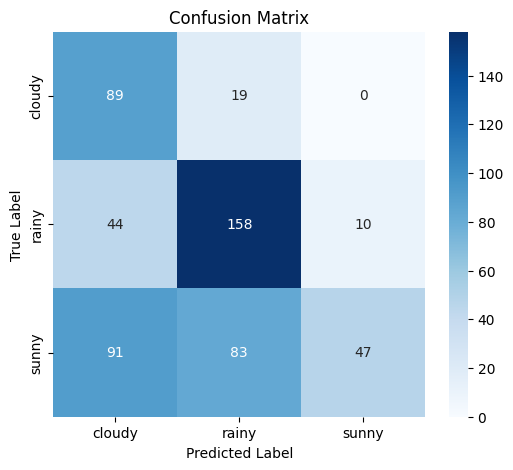

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# **1️⃣ Define Dataset Paths**
base_dir = "/content/drive/MyDrive/dataset"
test_dir = os.path.join(base_dir, "test")

# **2️⃣ Reload Test Data Generator**
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    shuffle=False
)

# **3️⃣ Load the saved model**
model_path = "/content/drive/MyDrive/final_weather_model_continued.keras"
model = load_model(model_path)

# **4️⃣ Evaluate Model on Test Data**
test_steps = int(np.ceil(test_generator.n / test_generator.batch_size))

test_loss, test_accuracy = model.evaluate(test_generator, steps=test_steps)
print(f"✅ Final Test Accuracy: {test_accuracy * 100:.2f}%")

# **5️⃣ Generate Predictions**
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator, steps=test_steps)
y_pred = np.argmax(y_pred_prob, axis=1)

# **6️⃣ Print Classification Report**
class_labels = list(test_generator.class_indices.keys())  # Get class names

print("\n📊 Classification Report:")
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)

# **7️⃣ Compute Confusion Matrix**
conf_matrix = confusion_matrix(y_true, y_pred)

# **8️⃣ Plot Confusion Matrix Using Matplotlib**
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Found 541 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


68/68 ━━━━━━━━━━━━━━━━━━━━ 48s 620ms/step - accuracy: 0.7259 - loss: 0.6705
✅ Updated Test Accuracy: 54.34% (With Augmented Test Data)
68/68 ━━━━━━━━━━━━━━━━━━━━ 47s 648ms/step

📊 Classification Report (With Augmented Test Data):
              precision    recall  f1-score   support

      cloudy       0.38      0.80      0.52       108
       rainy       0.60      0.71      0.65       212
       sunny       0.88      0.25      0.39       221

    accuracy                           0.54       541
   macro avg       0.62      0.59      0.52       541
weighted avg       0.67      0.54      0.52       541



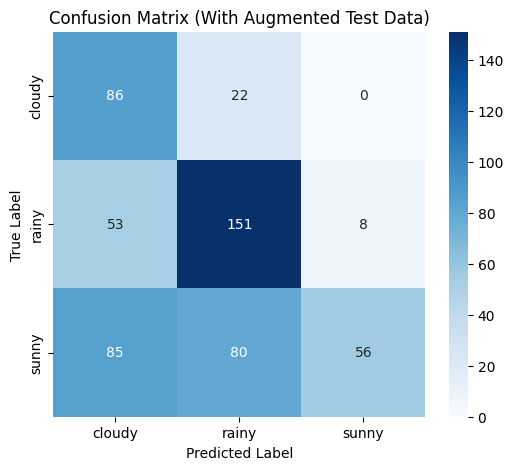

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# **1️⃣ Define Dataset Paths**
base_dir = "/content/drive/MyDrive/dataset"
test_dir = os.path.join(base_dir, "test")

# **2️⃣ Apply Slight Data Augmentation for Test Set**
# 🔹 Adds slight brightness and zoom changes to match training variations
test_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    brightness_range=[0.9, 1.1],  # 🔥 Slight brightness adjustments
    zoom_range=0.1  # 🔥 Small zoom to match training variations
)

# **3️⃣ Reload Test Data Generator**
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    shuffle=False  # 🔥 Keep order same for evaluation
)

# **4️⃣ Load the Saved Model**
model_path = "/content/drive/MyDrive/final_weather_model_continued.keras"
model = load_model(model_path)

# **5️⃣ Evaluate Model on Augmented Test Data**
test_steps = int(np.ceil(test_generator.n / test_generator.batch_size))

test_loss, test_accuracy = model.evaluate(test_generator, steps=test_steps)
print(f"✅ Updated Test Accuracy: {test_accuracy * 100:.2f}% (With Augmented Test Data)")

# **6️⃣ Generate Predictions**
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator, steps=test_steps)
y_pred = np.argmax(y_pred_prob, axis=1)

# **7️⃣ Print Classification Report**
class_labels = list(test_generator.class_indices.keys())  # Get class names

print("\n📊 Classification Report (With Augmented Test Data):")
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)

# **8️⃣ Compute Confusion Matrix**
conf_matrix = confusion_matrix(y_true, y_pred)

# **9️⃣ Plot Confusion Matrix Using Matplotlib**
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (With Augmented Test Data)")
plt.show()

Found 1200 images belonging to 3 classes.
Found 541 images belonging to 3 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 478s 3s/step - accuracy: 0.3362 - loss: 1.1619 - val_accuracy: 0.2181 - val_loss: 1.1232 - learning_rate: 1.0000e-05
Epoch 2/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 344s 2s/step - accuracy: 0.4305 - loss: 1.0841 - val_accuracy: 0.3641 - val_loss: 1.1066 - learning_rate: 1.0000e-05
Epoch 3/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 343s 2s/step - accuracy: 0.4877 - loss: 0.9864 - val_accuracy: 0.4399 - val_loss: 1.0478 - learning_rate: 1.0000e-05
Epoch 4/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 340s 2s/step - accuracy: 0.5795 - loss: 0.9243 - val_accuracy: 0.6063 - val_loss: 0.9313 - learning_rate: 1.0000e-05
Epoch 5/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 384s 2s/step - accuracy: 0.6239 - loss: 0.8467 - val_accuracy: 0.7338 - val_loss: 0.8357 - learning_rate: 1.0000e-05
Epoch 6/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 342s 2s/step - accuracy: 0.6487 - loss: 0.8038 - val_accuracy: 0.6839 - val_loss: 0.8449 - learning_rate: 1.0000e-05
Epoch 7/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 346s 2s/step - acc

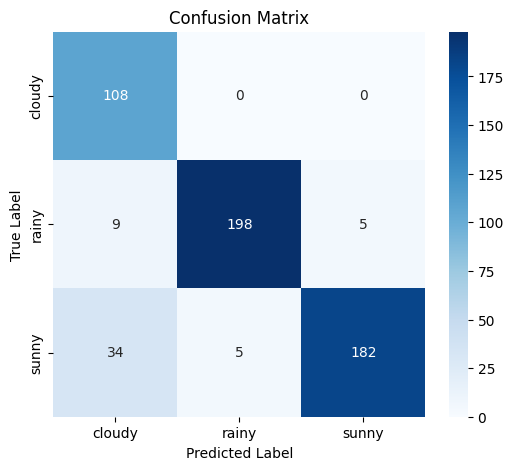

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
import os
import gc

# Clear GPU Memory
tf.keras.backend.clear_session()
gc.collect()

# Define Dataset Paths
base_dir = "/content/drive/MyDrive/dataset"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Data Augmentation for Training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=60,
    width_shift_range=0.5,
    height_shift_range=0.5,
    shear_range=0.5,
    zoom_range=0.5,
    brightness_range=[0.3, 1.7],
    horizontal_flip=True
)

# Apply Controlled Augmentation for Test Set
test_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    brightness_range=[0.9, 1.1],
    zoom_range=0.1
)

# Load Data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    shuffle=False
)

# Compute Class Weights to Fix Imbalance
y_train = train_generator.classes
counter = Counter(y_train)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {i: weight for i, weight in enumerate(class_weights)}

# Load EfficientNetB0 & Unfreeze More Layers
feature_extractor = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in feature_extractor.layers[-150:]:  # Unfreeze more layers for better fine-tuning
    layer.trainable = True

# Define Model with Stronger Regularization
model = Sequential([
    feature_extractor,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.7),  # Increase dropout to reduce overfitting
    Dense(3, activation='softmax')
])

# Use a Lower Learning Rate for Fine-Tuning
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Implement Learning Rate Adjustment
callbacks = [
    ModelCheckpoint('/content/drive/MyDrive/fixed_weather_model.keras', save_best_only=True, monitor='val_loss', mode='min'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-7)
]

# Train Model Using Class Weights
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=30,  # Increase epochs for better learning
    class_weight=class_weights,
    callbacks=callbacks
)

# Save Updated Model Under a New Name
model.save("/content/drive/MyDrive/fixed_weather_model.keras")

# Evaluate Model on Test Data
test_steps = int(np.ceil(test_generator.n / test_generator.batch_size))

test_loss, test_accuracy = model.evaluate(test_generator, steps=test_steps)
print(f"Final Test Accuracy: {test_accuracy * 100:.2f}%")

# Generate Predictions
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator, steps=test_steps)
y_pred = np.argmax(y_pred_prob, axis=1)

# Print Classification Report
class_labels = list(test_generator.class_indices.keys())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix Using Matplotlib
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
model_path = "/content/drive/MyDrive/final_weather_model_continued.keras"
print(f"✅ Loaded Model: {model_path}")

✅ Loaded Model: /content/drive/MyDrive/final_weather_model_continued.keras


In [ ]:
from tensorflow.keras.models import load_model

# Load last saved model
model_path = "/content/drive/MyDrive/best_weather_model.keras"
model = load_model(model_path)

# Print model summary to confirm it loaded correctly
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,036,901 (53.55 MB)

 Trainable params: 4,664,959 (17.80 MB)

 Non-trainable params: 42,023 (164.16 KB)

 Optimizer params: 9,329,919 (35.59 MB)

In [ ]:
import os
from PIL import Image

train_dir = "/content/drive/MyDrive/dataset/train"

for class_folder in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_folder)
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            try:
                img = Image.open(img_path)
                img.verify()  # Verify image integrity
            except (IOError, SyntaxError) as e:
                print(f"⚠️ Corrupt image detected: {img_path}")

In [ ]:
import os
import shutil

# Base dataset directory
base_dir = "/content/drive/MyDrive/dataset"

# Define class remapping
class_mapping = {
    "rainy": "rainy",
    "foggy": "rainy",  # Foggy → Rainy
    "shine": "sunny",
    "sunrise": "sunny",  # Shine + Sunrise → Sunny
    "cloudy": "cloudy"  # Cloudy remains Cloudy
}

# Log missing files
missing_files_log = []

# Function to safely relabel images
def relabel_images(dataset_type):
    dataset_dir = os.path.join(base_dir, dataset_type)  # 'train' or 'test'

    # Ensure destination folders exist
    for new_label in ["rainy", "sunny", "cloudy"]:
        os.makedirs(os.path.join(dataset_dir, new_label), exist_ok=True)

    # Move images into new categories
    for old_label, new_label in class_mapping.items():
        old_path = os.path.join(dataset_dir, old_label)
        new_path = os.path.join(dataset_dir, new_label)

        if os.path.exists(old_path):  # Ensure old folder exists
            for img in os.listdir(old_path):
                old_img_path = os.path.join(old_path, img)
                new_img_path = os.path.join(new_path, img)

                # **Check if the file exists before moving**
                if os.path.isfile(old_img_path):
                    try:
                        shutil.move(old_img_path, new_img_path)
                        print(f"✅ Moved: {old_img_path} → {new_img_path}")
                    except Exception as e:
                        print(f"⚠️ Error moving {old_img_path}: {e}")
                else:
                    print(f"⚠️ Missing file: {old_img_path}")
                    missing_files_log.append(old_img_path)

            # **Remove folder if empty after moving**
            if not os.listdir(old_path):
                os.rmdir(old_path)
                print(f"🗑️ Removed empty folder: {old_path}")

# Apply relabeling to both 'train' and 'test'
relabel_images("train")
relabel_images("test")

# Save missing files log
if missing_files_log:
    with open(os.path.join(base_dir, "missing_files_log.txt"), "w") as log_file:
        for missing_file in missing_files_log:
            log_file.write(missing_file + "\n")
    print("⚠️ Some files were missing! Check 'missing_files_log.txt'.")

print("✅ Dataset relabeling completed! Check your 'train/' and 'test/' folders.")

🗑️ Removed empty folder: /content/drive/MyDrive/dataset/train/rainy
⚠️ Error moving /content/drive/MyDrive/dataset/train/foggy/foggy10.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/dataset/train/rainy/foggy10.jpg'
⚠️ Error moving /content/drive/MyDrive/dataset/train/foggy/foggy121.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/dataset/train/rainy/foggy121.jpg'
⚠️ Error moving /content/drive/MyDrive/dataset/train/foggy/foggy126.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/dataset/train/rainy/foggy126.jpg'
⚠️ Error moving /content/drive/MyDrive/dataset/train/foggy/foggy259.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/dataset/train/rainy/foggy259.jpg'
⚠️ Error moving /content/drive/MyDrive/dataset/train/foggy/foggy189.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/dataset/train/rainy/foggy189.jpg'
⚠️ Error moving /content/drive/MyDrive/dataset/train/foggy/foggy250.jpg: [Errno 2] No such fil

In [ ]:
train_batches = len(train_generator)
test_batches = len(test_generator)

print(f"✅ Train Batches: {train_batches} | Train Steps Per Epoch: {steps_per_epoch}")
print(f"✅ Test Batches: {test_batches} | Test Steps Per Epoch: {test_steps}")

if steps_per_epoch > train_batches:
    print("⚠️ Warning: `steps_per_epoch` is greater than available train batches. Adjusting to prevent error.")
    steps_per_epoch = train_batches

if test_steps > test_batches:
    print("⚠️ Warning: `validation_steps` is greater than available test batches. Adjusting to prevent error.")
    test_steps = test_batches

✅ Train Batches: 94 | Train Steps Per Epoch: 93
✅ Test Batches: 34 | Test Steps Per Epoch: 33


In [ ]:
# Check if all train and test images belong to valid classes
print("Train classes:", train_generator.class_indices)
print("Test classes:", test_generator.class_indices)

# Verify number of images per class
for class_name in train_generator.class_indices:
    class_path = os.path.join(train_dir, class_name)
    num_images = len(os.listdir(class_path))
    print(f"Class {class_name}: {num_images} images")

Train classes: {'cloudy': 0, 'foggy': 1, 'rainy': 2, 'shine': 3, 'sunrise': 4}
Test classes: {'cloudy': 0, 'foggy': 1, 'rainy': 2, 'shine': 3, 'sunrise': 4}
Class cloudy: 300 images
Class foggy: 300 images
Class rainy: 300 images
Class shine: 250 images
Class sunrise: 350 images


In [ ]:
import os
import shutil

base_dir = "/content/drive/MyDrive/dataset"

# Define correct train/test directories
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Ensure train/test folders exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# **1️⃣ Move misplaced category folders into "train/"**
for category in ["cloudy", "foggy", "rainy", "shine", "sunrise"]:
    src_path = os.path.join(base_dir, category)
    dst_path = os.path.join(train_dir, category)

    if os.path.exists(src_path):  # Check if the category folder exists
        os.makedirs(dst_path, exist_ok=True)  # Ensure destination folder exists
        for img in os.listdir(src_path):  # Move each image
            shutil.move(os.path.join(src_path, img), os.path.join(dst_path, img))
        shutil.rmtree(src_path)  # Remove the now-empty category folder
        print(f"✅ Moved {category} images to train folder.")

# **2️⃣ Move misplaced train/test images inside "train/train/" or "test/test/"**
def move_nested_folders(main_folder):
    nested_folder = os.path.join(main_folder, os.path.basename(main_folder))
    if os.path.exists(nested_folder):  # Check if the nested folder exists
        for class_name in os.listdir(nested_folder):
            src = os.path.join(nested_folder, class_name)
            dst = os.path.join(main_folder, class_name)
            if os.path.isdir(src):
                os.makedirs(dst, exist_ok=True)
                for img in os.listdir(src):
                    shutil.move(os.path.join(src, img), os.path.join(dst, img))
        shutil.rmtree(nested_folder)  # Remove the now-empty nested folder
        print(f"✅ Fixed {main_folder} structure.")

move_nested_folders(train_dir)  # Fix nested train/train issue
move_nested_folders(test_dir)   # Fix nested test/test issue

# **3️⃣ Remove any remaining "train/" or "test/" folders inside "train/" and "test/"**
for folder in ["train", "test"]:
    extra_folder = os.path.join(train_dir, folder)
    if os.path.exists(extra_folder):
        shutil.rmtree(extra_folder)
        print(f"✅ Removed extra /{folder}/ inside train.")

    extra_folder = os.path.join(test_dir, folder)
    if os.path.exists(extra_folder):
        shutil.rmtree(extra_folder)
        print(f"✅ Removed extra /{folder}/ inside test.")

print("🎯 Dataset structure fixed successfully!")

✅ Moved cloudy images to train folder.
✅ Moved foggy images to train folder.
✅ Moved rainy images to train folder.
✅ Moved shine images to train folder.
✅ Moved sunrise images to train folder.
✅ Removed extra /train/ inside test.
✅ Removed extra /test/ inside train.
🎯 Dataset structure fixed successfully!


In [ ]:
import os

base_dir = "/content/drive/MyDrive/dataset"

for root, dirs, files in os.walk(base_dir):
    level = root.replace(base_dir, "").count(os.sep)
    indent = " " * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    sub_indent = " " * 4 * (level + 1)
    for f in files[:5]:  # Show only first 5 files per folder
        print(f"{sub_indent}{f}")

dataset/
    test.csv
    alien_test/
        rain_3.jpg
        Cloud_1.png
        foggy_9.jpg
        foggy_6.jpg
        foggy_5.jpg
    train/
        sunrise/
            sunrise238.jpg
            sunrise203.jpg
            sunrise180.jpg
            sunrise23.jpg
            sunrise268.jpg
        foggy/
            foggy10.jpg
            foggy121.jpg
            foggy126.jpg
            foggy259.jpg
            foggy189.jpg
        cloudy/
            cloudy92.jpg
            cloudy288.jpg
            cloudy156.jpg
            cloudy205.jpg
            cloudy281.jpg
        rainy/
            rain205.jpg
            rain144.jpg
            rain151.jpg
            rain247.jpg
            rain24.jpeg
        shine/
            shine161.jpg
            shine85.jpg
            shine229.jpg
            shine42.jpg
            shine69.jpg
    test/
        sunrise/
            sunrise330.jpg
            sunrise274.jpg
            sunrise184.jpg
            sunrise112.jpg
          